<a href="https://colab.research.google.com/github/Nithin-Pranav/AI-PriceOptima/blob/main/Dynamic_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 df = pd.read_csv('/content/dynamic_pricing.csv')

In [3]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [4]:
df.tail()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048
999,78,63,Rural,Gold,14,4.21,Afternoon,Economy,147,655.065106


In [5]:
print("Shape of dataset:", df.shape)

Shape of dataset: (1000, 10)


In [6]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [7]:
df.dtypes

,0
Number_of_Riders,int64
Number_of_Drivers,int64
Location_Category,object
Customer_Loyalty_Status,object
Number_of_Past_Rides,int64
Average_Ratings,float64
Time_of_Booking,object
Vehicle_Type,object
Expected_Ride_Duration,int64
Historical_Cost_of_Ride,float64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [9]:
df.isnull().sum()

,0
Number_of_Riders,0
Number_of_Drivers,0
Location_Category,0
Customer_Loyalty_Status,0
Number_of_Past_Rides,0
Average_Ratings,0
Time_of_Booking,0
Vehicle_Type,0
Expected_Ride_Duration,0
Historical_Cost_of_Ride,0


In [10]:
df.columns.tolist()

['Number_of_Riders',
 'Number_of_Drivers',
 'Location_Category',
 'Customer_Loyalty_Status',
 'Number_of_Past_Rides',
 'Average_Ratings',
 'Time_of_Booking',
 'Vehicle_Type',
 'Expected_Ride_Duration',
 'Historical_Cost_of_Ride']

In [11]:
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)
if dup_count > 0:
    df = df.drop_duplicates().reset_index(drop=True)
    print("Duplicates dropped. New shape:", df.shape)

Duplicate rows: 0


In [12]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].str.strip().str.capitalize()
    print(f"\nUnique values for {col}: {df[col].unique()}")
    print(f"Value counts for {col}:\n{df[col].value_counts()}")


Unique values for Location_Category: ['Urban' 'Suburban' 'Rural']
Value counts for Location_Category:
Location_Category
Urban       346
Rural       332
Suburban    322
Name: count, dtype: int64

Unique values for Customer_Loyalty_Status: ['Silver' 'Regular' 'Gold']
Value counts for Customer_Loyalty_Status:
Customer_Loyalty_Status
Silver     367
Regular    320
Gold       313
Name: count, dtype: int64

Unique values for Time_of_Booking: ['Night' 'Evening' 'Afternoon' 'Morning']
Value counts for Time_of_Booking:
Time_of_Booking
Night        276
Afternoon    247
Morning      246
Evening      231
Name: count, dtype: int64

Unique values for Vehicle_Type: ['Premium' 'Economy']
Value counts for Vehicle_Type:
Vehicle_Type
Premium    522
Economy    478
Name: count, dtype: int64


In [13]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)][col].count()
    outlier_pct = (outliers / len(df)) * 100
    print(f"{col}: {outliers} outliers ({outlier_pct:.2f}%)")

Number_of_Riders: 0 outliers (0.00%)
Number_of_Drivers: 10 outliers (1.00%)
Number_of_Past_Rides: 0 outliers (0.00%)
Average_Ratings: 0 outliers (0.00%)
Expected_Ride_Duration: 0 outliers (0.00%)
Historical_Cost_of_Ride: 0 outliers (0.00%)


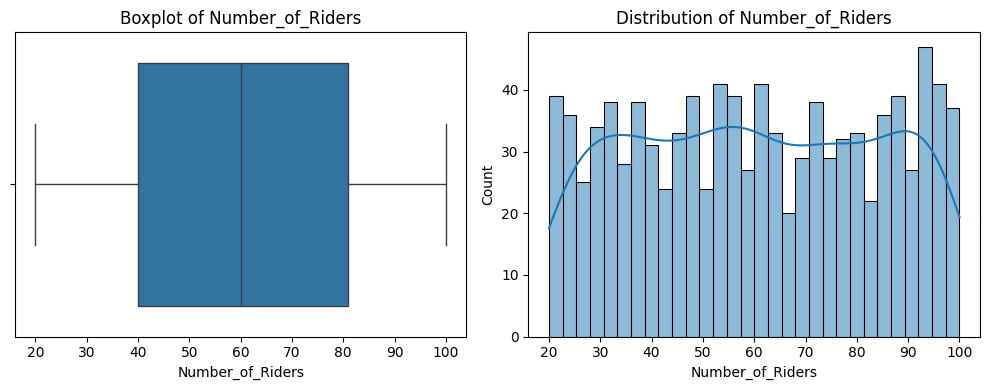

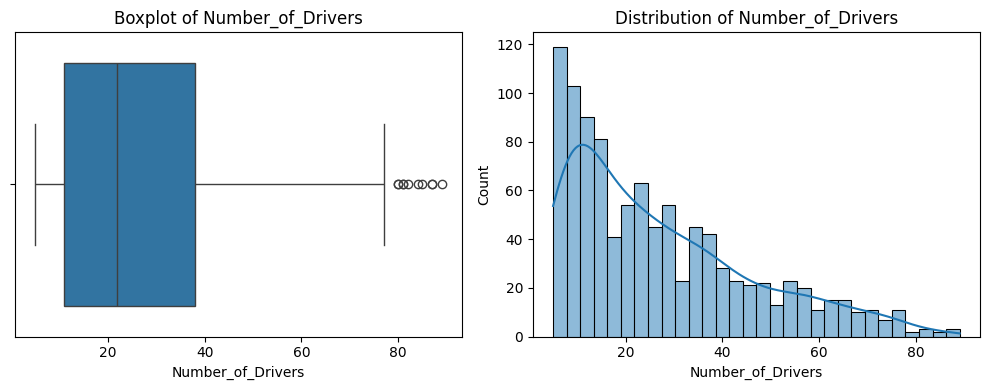

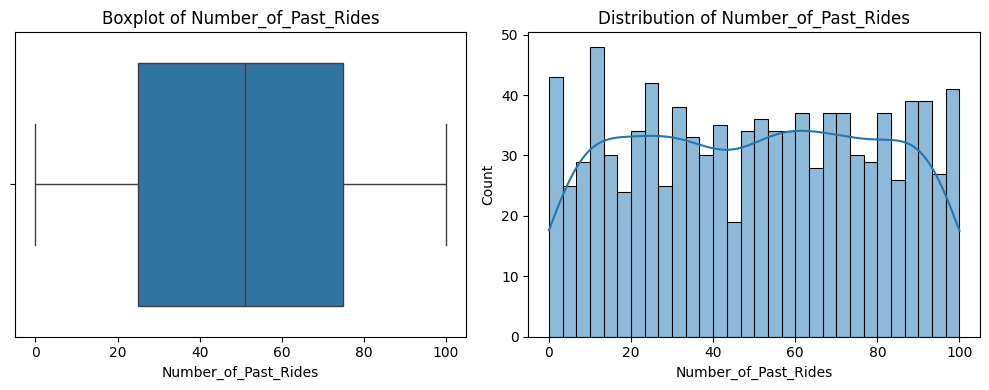

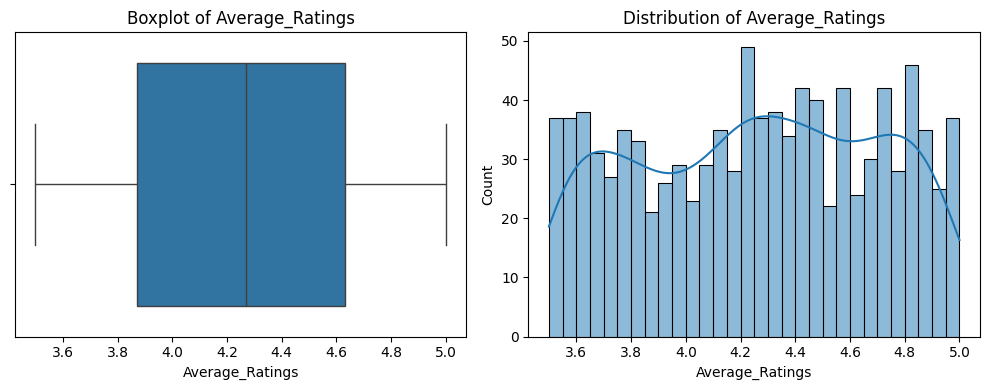

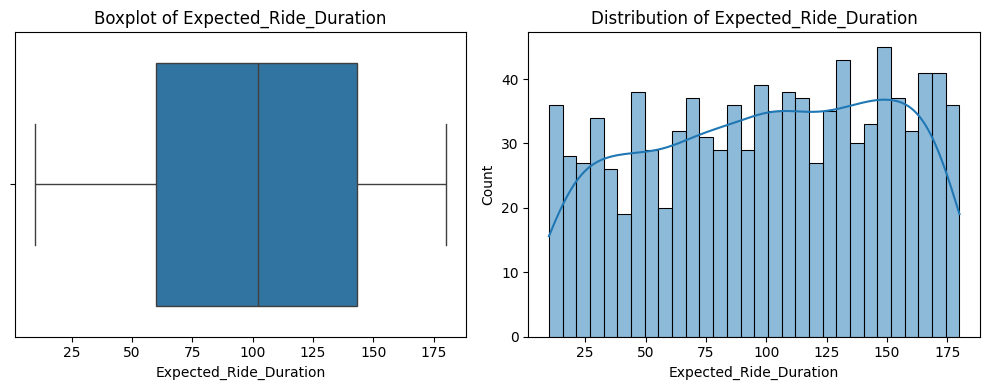

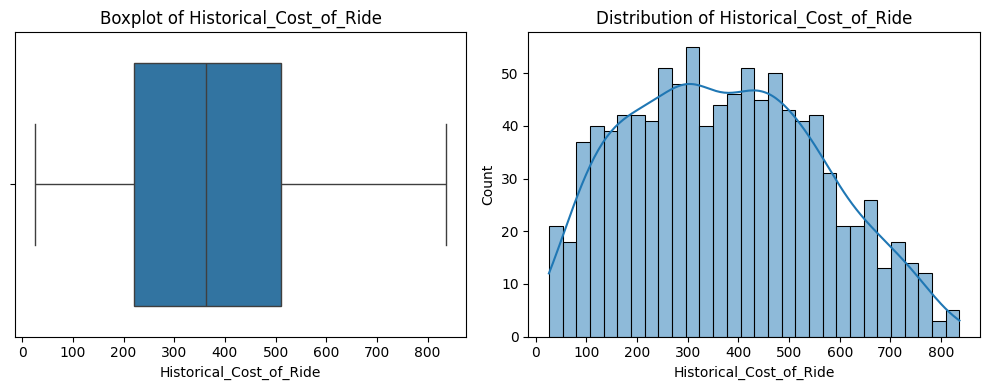

In [14]:
for col in numeric_cols:
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

    plt.subplot(1, 2, 2)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")

    plt.tight_layout()
    plt.show()

In [15]:
df_numeric = df.select_dtypes(include=[np.number])
corr = df_numeric.corr()
print(corr)

                         Number_of_Riders  Number_of_Drivers  \
Number_of_Riders                 1.000000           0.627016   
Number_of_Drivers                0.627016           1.000000   
Number_of_Past_Rides             0.029265           0.039660   
Average_Ratings                  0.008572           0.041204   
Expected_Ride_Duration          -0.015856          -0.024418   
Historical_Cost_of_Ride          0.005826           0.017082   

                         Number_of_Past_Rides  Average_Ratings  \
Number_of_Riders                     0.029265         0.008572   
Number_of_Drivers                    0.039660         0.041204   
Number_of_Past_Rides                 1.000000        -0.064734   
Average_Ratings                     -0.064734         1.000000   
Expected_Ride_Duration               0.030679        -0.016968   
Historical_Cost_of_Ride              0.035859        -0.001063   

                         Expected_Ride_Duration  Historical_Cost_of_Ride  
Number_of_Rid

In [16]:
target = "Historical_Cost_of_Ride"
if target in corr.columns:
    print(f"\nCorrelation with the target variable '{target}':")
    print(corr[target].sort_values(ascending=False))


Correlation with the target variable 'Historical_Cost_of_Ride':
Historical_Cost_of_Ride    1.000000
Expected_Ride_Duration     0.927547
Number_of_Past_Rides       0.035859
Number_of_Drivers          0.017082
Number_of_Riders           0.005826
Average_Ratings           -0.001063
Name: Historical_Cost_of_Ride, dtype: float64


In [17]:
for col in ["Location_Category", "Customer_Loyalty_Status", "Vehicle_Type", "Time_of_Booking"]:
    if col in df.columns:
        print(f"\nAnalysis by {col}:")
        print(df.groupby(col)[target].agg(["count", "mean", "median", "std"]).sort_values("mean", ascending=False))


Analysis by Location_Category:
                   count        mean      median         std
Location_Category                                           
Rural                332  379.942172  367.756592  187.224517
Suburban             322  374.319486  362.699542  187.343980
Urban                346  363.673259  359.955839  187.106320

Analysis by Customer_Loyalty_Status:
                         count        mean      median         std
Customer_Loyalty_Status                                           
Regular                    320  380.125251  358.951011  189.611633
Gold                       313  376.118746  373.975636  184.967070
Silver                     367  362.772140  348.669562  186.956263

Analysis by Vehicle_Type:
              count        mean      median         std
Vehicle_Type                                           
Premium         522  396.246242  397.587527  184.316822
Economy         478  346.573399  331.230917  186.987292

Analysis by Time_of_Booking:
         

In [18]:
print("\nSkewness of Numerical Features:")
for col in numeric_cols:
    print(f"{col}: {df[col].skew():.2f}")


Skewness of Numerical Features:
Number_of_Riders: 0.00
Number_of_Drivers: 0.96
Number_of_Past_Rides: -0.01
Average_Ratings: -0.08
Expected_Ride_Duration: -0.14
Historical_Cost_of_Ride: 0.21


In [19]:
import pandas as pd
import numpy as np

def calculate_kpis(
    df_base: pd.DataFrame,
    df_scn: pd.DataFrame,
    *,
    pcomplete_col="p_complete",
    intents_col="Number_of_Riders",
    price_col="price",
    cost_col="Historical_Cost_of_Ride"
):

    # -- Demand (Booking Intents) --
    intents_base = df_base[intents_col].astype(float).clip(lower=1)
    intents_scn = df_scn[intents_col].astype(float).clip(lower=1)

    # -- Completed Rides --
    comp_base = intents_base * df_base[pcomplete_col].astype(float)
    comp_scn = intents_scn * df_scn[pcomplete_col].astype(float)

    # -- Revenue --
    rev_base = (df_base[price_col].astype(float) * comp_base).sum()
    rev_scn = (df_scn[price_col].astype(float) * comp_scn).sum()

    # -- Cost --
    cost_base = (df_base[cost_col].astype(float) * comp_base).sum()
    cost_scn = (df_scn[cost_col].astype(float) * comp_scn).sum()

    # -- Revenue Lift (%) --
    revenue_lift_pct = (rev_scn - rev_base) / max(rev_base, 1e-9) * 100.0

    # -- Gross Margin (%) --
    gm_base = (rev_base - cost_base) / max(rev_base, 1e-9) * 100.0
    gm_scn = (rev_scn - cost_scn) / max(rev_scn, 1e-9) * 100.0

    # -- Conversion Rate (%) --
    conv_base = (comp_base.sum() / intents_base.sum()) * 100.0
    conv_scn = (comp_scn.sum() / intents_scn.sum()) * 100.0

    # -- Cancellation Rate (%) --
    canc_base = 100.0 - conv_base
    canc_scn = 100.0 - conv_scn

    # -- Price Change Rate (%) --
    price_change_rate = (
        (df_base[price_col].astype(float) != df_scn[price_col].astype(float))
        .mean() * 100.0
    )

    results = {
        "Revenue (₹) Baseline": round(rev_base, 2),
        "Revenue (₹) Scenario": round(rev_scn, 2),
        "Revenue Lift (%)": round(revenue_lift_pct, 2),
        "Gross Margin (Baseline %)": round(gm_base, 2),
        "Gross Margin (Scenario %)": round(gm_scn, 2),
        "Conversion Rate (Baseline %)": round(conv_base, 2),
        "Conversion Rate (Scenario %)": round(conv_scn, 2),
        "Cancellation Rate (Baseline %)": round(canc_base, 2),
        "Cancellation Rate (Scenario %)": round(canc_scn, 2),
        "Price Change Rate (%)": round(price_change_rate, 2),
    }

In [20]:
import numpy as np
import pandas as pd
from IPython.display import display

df_fe = df.copy()

num_cols = df_fe.select_dtypes(include="number").columns.tolist()
cat_cols = df_fe.select_dtypes(exclude="number").columns.tolist()

# 3.1 Loyalty score
if "Customer_Loyalty_Status" in df_fe.columns:
    _loy_map = {"Regular": 0, "Silver": 1, "Gold": 2}
    df_fe["Loyalty_Score"] = df_fe["Customer_Loyalty_Status"].map(_loy_map).fillna(0).astype(int)

# 3.2 Ratios / resource pressure
if "Number_of_Riders" in df_fe.columns and "Number_of_Drivers" in df_fe.columns:
    df_fe["Rider_Driver_Ratio"] = df_fe["Number_of_Riders"] / (df_fe["Number_of_Drivers"].clip(lower=1))
    df_fe["Driver_to_Rider_Ratio"] = df_fe["Number_of_Drivers"] / (df_fe["Number_of_Riders"].clip(lower=1))
    df_fe["Supply_Tightness"] = 1.0 / df_fe["Driver_to_Rider_Ratio"]

# 3.3 Cost granularity
if "Historical_Cost_of_Ride" in df_fe.columns and "Expected_Ride_Duration" in df_fe.columns:
    df_fe["Cost_per_Min"] = df_fe["Historical_Cost_of_Ride"] / (df_fe["Expected_Ride_Duration"].clip(lower=1))

# 3.4 Vehicle factor
if "Vehicle_Type" in df_fe.columns:
    _veh_map = {"Economy": 1.0, "Premium": 1.25}
    df_fe["Vehicle_Factor"] = df_fe["Vehicle_Type"].map(_veh_map).astype(float).fillna(1.1)

# 3.5 Peak indicator
if "Time_of_Booking" in df_fe.columns:
    df_fe["Peak"] = df_fe["Time_of_Booking"].isin(["Morning", "Evening"]).astype(int)

# 3.6 Inventory Health proxy
if {"Number_of_Drivers", "Number_of_Riders", "Supply_Tightness"}.issubset(df_fe.columns):
    df_fe["Inventory_Health_Index"] = (
        0.6 * (df_fe["Number_of_Drivers"] / df_fe["Number_of_Riders"].clip(lower=1)).clip(upper=2.0)
        + 0.4 * (1.0 - df_fe["Supply_Tightness"].clip(upper=2.0) / 2.0)
    )

# 3.7 Baseline price
def _baseline_price_row(r):
    cost = float(r["Historical_Cost_of_Ride"])
    v_adj = {"Economy": 1.10, "Premium": 1.22}
    t_adj = {"Morning": 1.02, "Afternoon": 1.00, "Evening": 1.04, "Night": 1.01}
    l_adj = {"Urban": 1.03, "Suburban": 1.02, "Rural": 0.98}
    base = cost * 1.15
    base *= v_adj.get(str(r.get("Vehicle_Type", "Economy")), 1.12)
    base *= t_adj.get(str(r.get("Time_of_Booking", "Afternoon")), 1.00)
    base *= l_adj.get(str(r.get("Location_Category", "Urban")), 1.00)
    return max(base, cost * 1.12)

if "Historical_Cost_of_Ride" in df_fe.columns:
    df_fe["baseline_price"] = df_fe.apply(_baseline_price_row, axis=1).round(2)

# 3.8 Competitor price index
np.random.seed(42)
if "baseline_price" in df_fe.columns:
    if "competitor_price" not in df_fe.columns:
        df_fe["competitor_price"] = (
            df_fe["baseline_price"] * np.random.uniform(0.94, 1.02, size=len(df_fe))
        ).round(2)
    df_fe["Competitor_Price_Index"] = (
        df_fe["baseline_price"] / df_fe["competitor_price"]
    ).replace([np.inf, -np.inf], np.nan)

# 3.9 Placeholder "price" & "p_complete"
if "baseline_price" in df_fe.columns:
    df_fe["price"] = df_fe["baseline_price"]

def estimate_complete(row, price):
    cost = float(row["Historical_Cost_of_Ride"])
    rel = (price / max(cost, 1e-6)) - 1.0
    ratio = float(row.get("Driver_to_Rider_Ratio", 1.0))
    loy = float(row.get("Loyalty_Score", 0))
    peak = float(row.get("Peak", 0))
    veh = float(row.get("Vehicle_Factor", 1.0))

    x = (
        -0.3
        + 0.9 * ratio
        + 0.12 * loy
        - 0.08 * peak
        - 0.45 * rel
        - 0.02 * (veh - 1.0)
    )
    x = np.clip(x, -40, 40)
    p = 1.0 / (1.0 + np.exp(-x))
    return float(np.clip(p, 0.02, 0.98))

df_fe["p_complete"] = df_fe.apply(lambda r: estimate_complete(r, r["price"]), axis=1)

print("Engineered columns added:")
print(sorted(set(df_fe.columns) - set(df.columns)))
display(df_fe.head(3))

Engineered columns added:
['Competitor_Price_Index', 'Cost_per_Min', 'Driver_to_Rider_Ratio', 'Inventory_Health_Index', 'Loyalty_Score', 'Peak', 'Rider_Driver_Ratio', 'Supply_Tightness', 'Vehicle_Factor', 'baseline_price', 'competitor_price', 'p_complete', 'price']


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,...,Supply_Tightness,Cost_per_Min,Vehicle_Factor,Peak,Inventory_Health_Index,baseline_price,competitor_price,Competitor_Price_Index,price,p_complete
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,...,2.000000,3.158414,1.25,0,0.300000,414.89,402.43,1.030962,414.89,0.514546
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,...,1.487179,4.043599,1.00,1,0.506012,233.32,237.07,0.984182,233.32,0.547686
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,...,1.354839,4.339414,1.25,0,0.571889,453.45,452.80,1.001436,453.45,0.577022


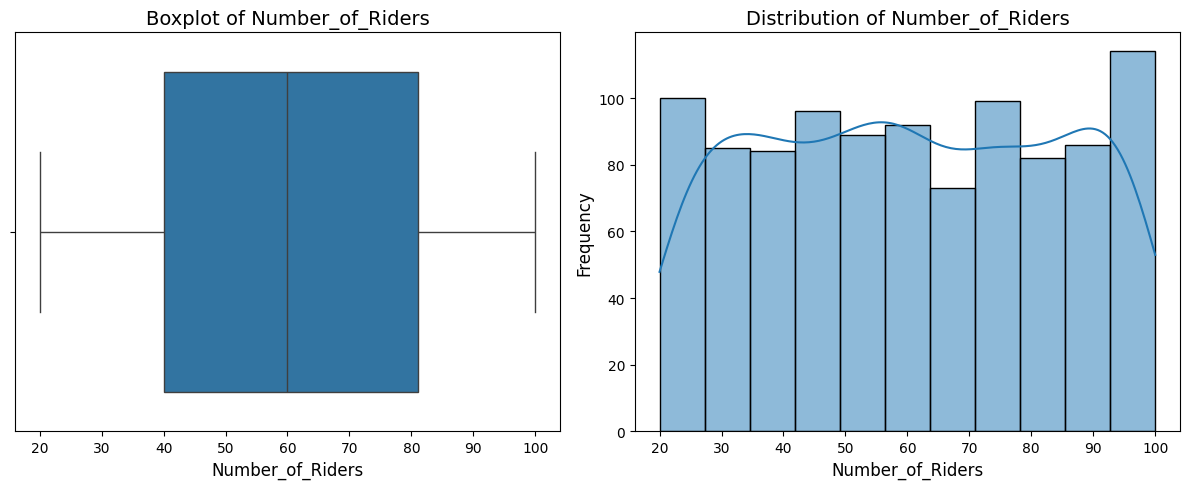

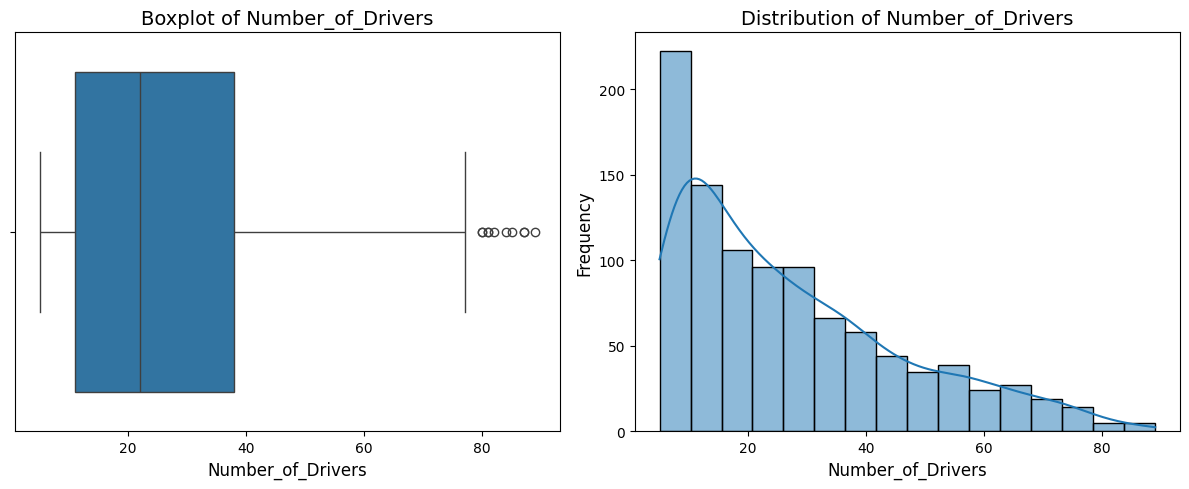

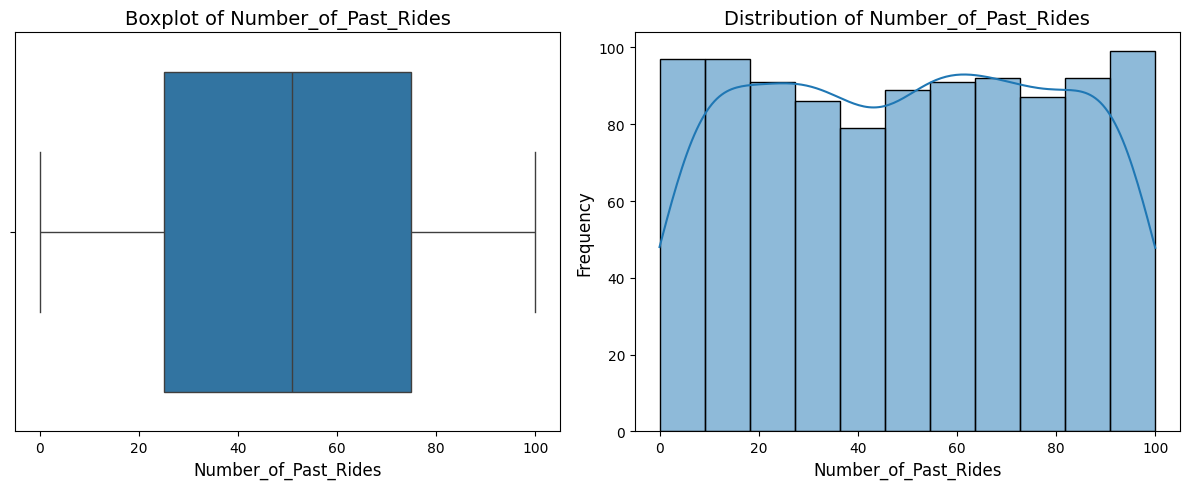

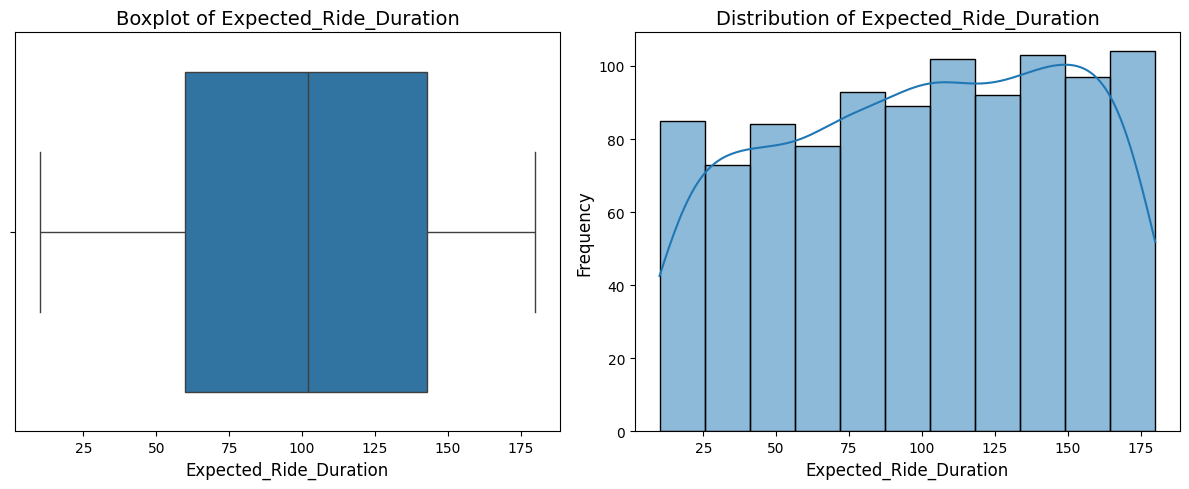

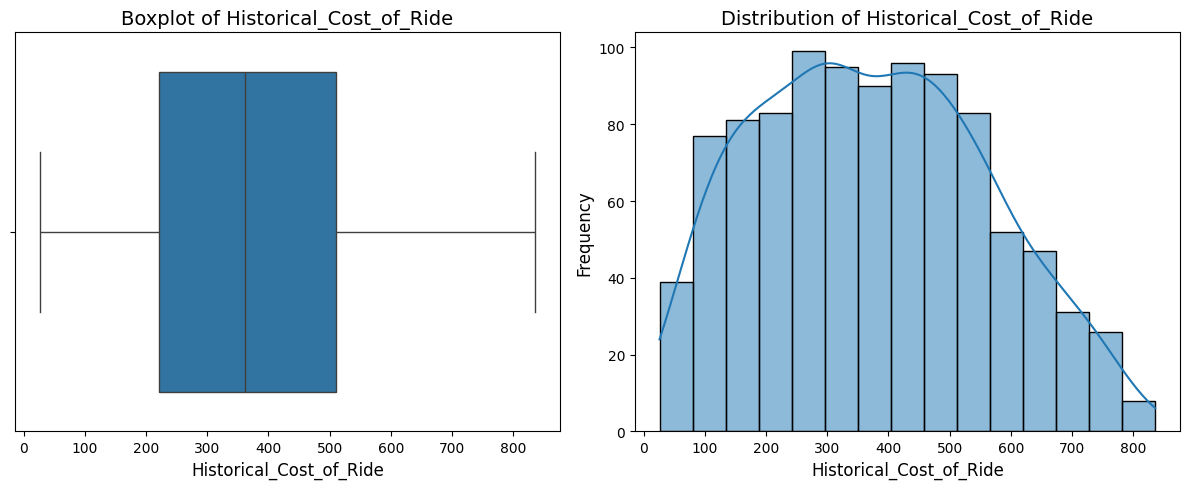

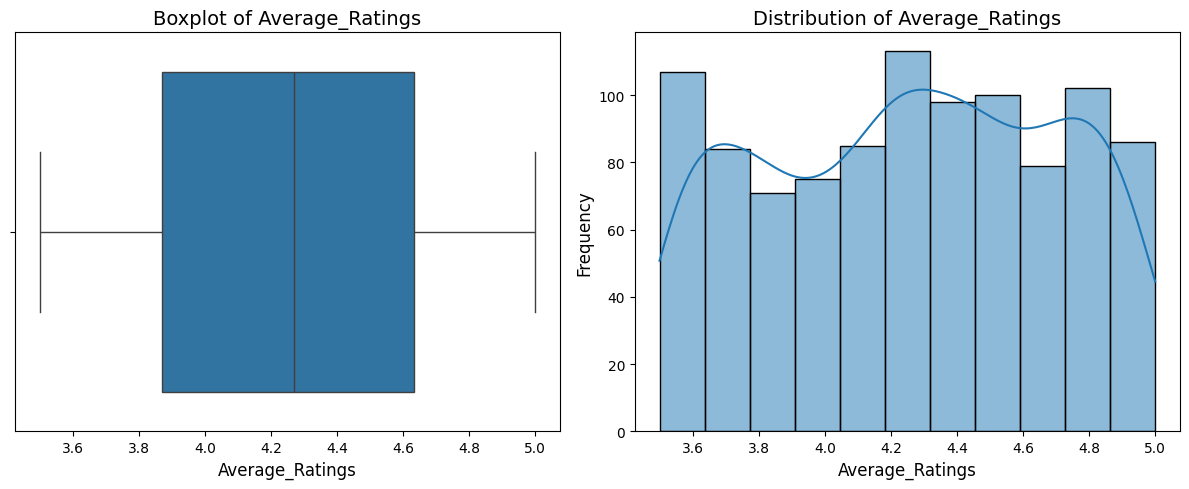

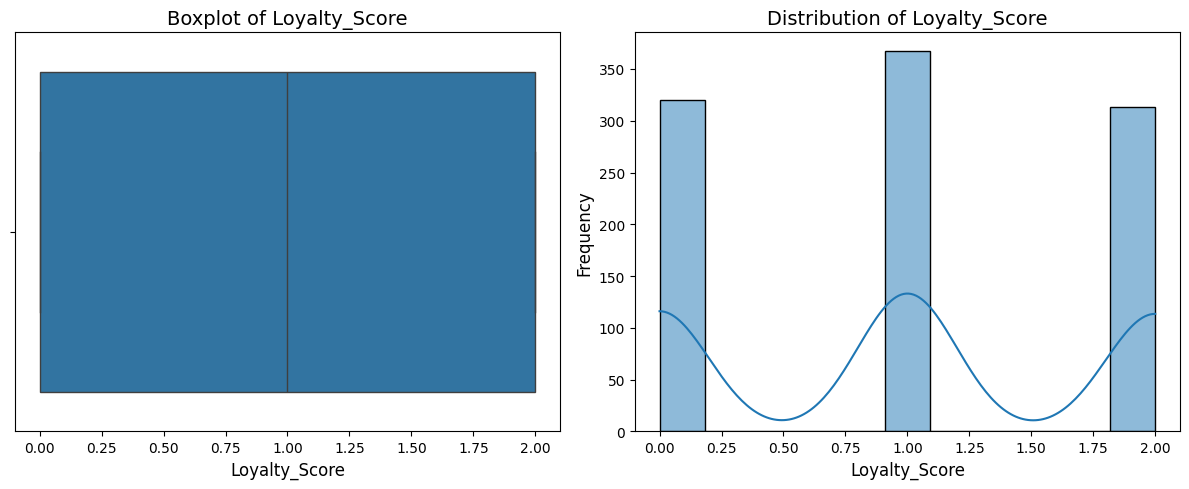

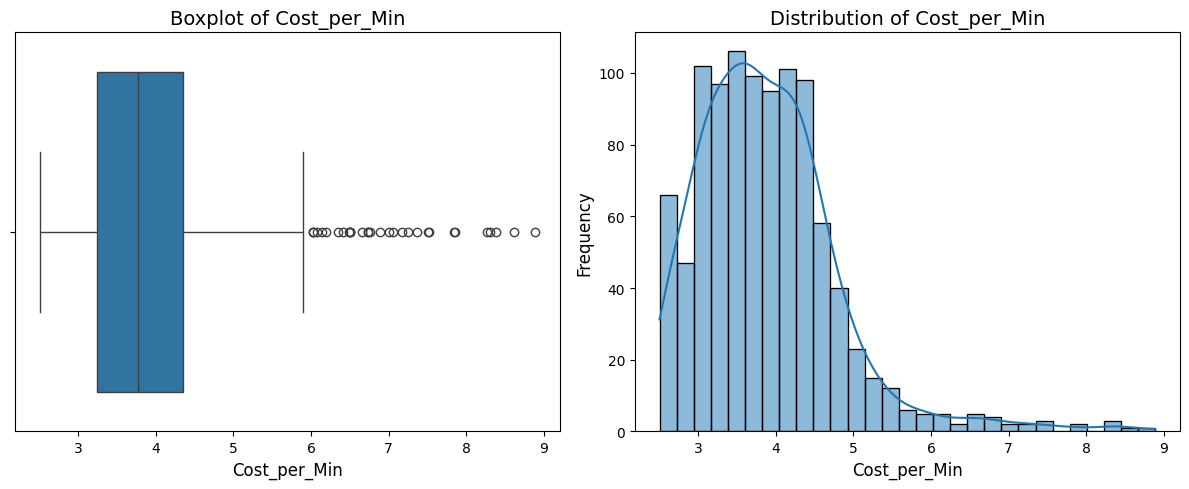


--- Visualizing Categorical Feature Counts ---


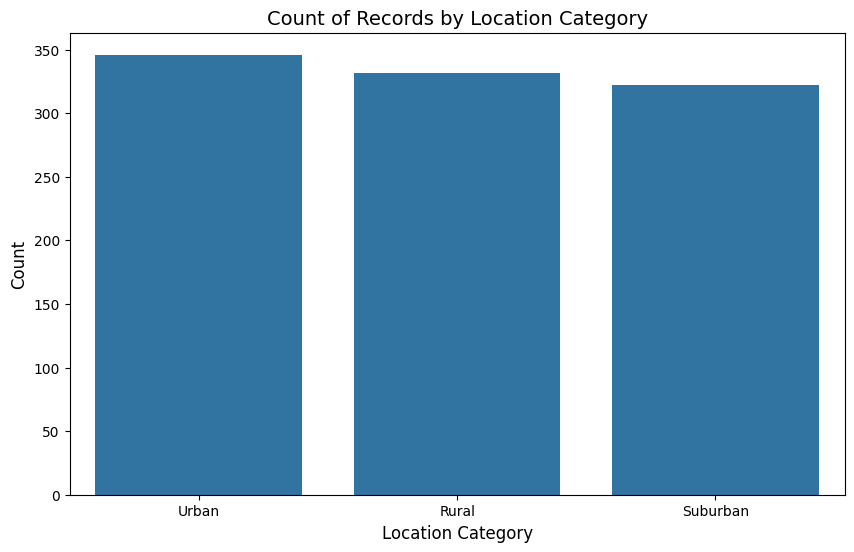

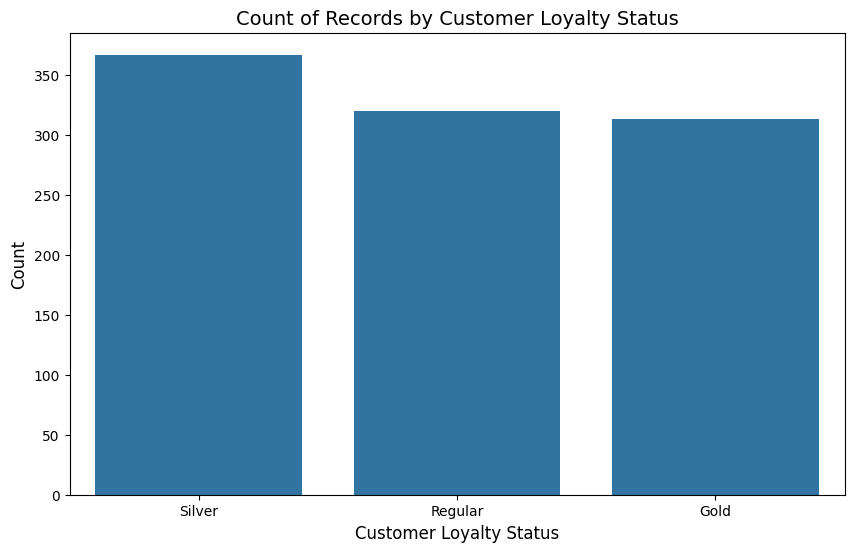

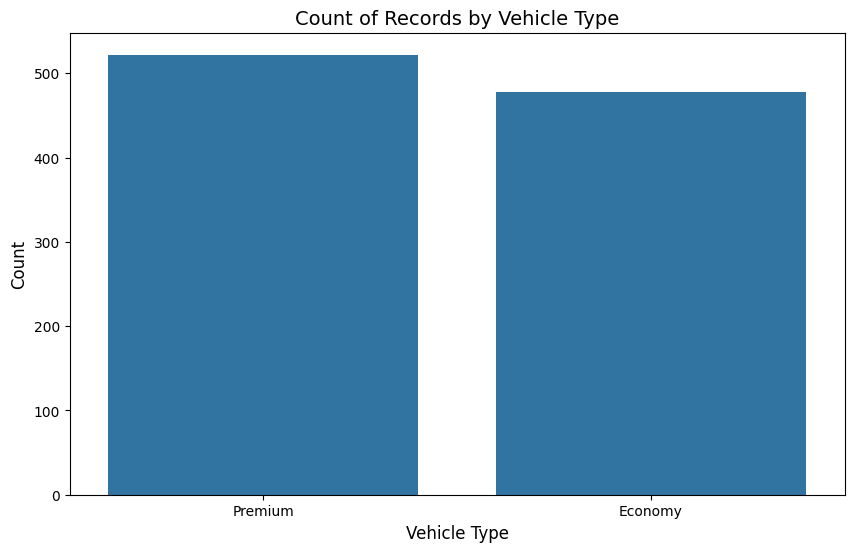

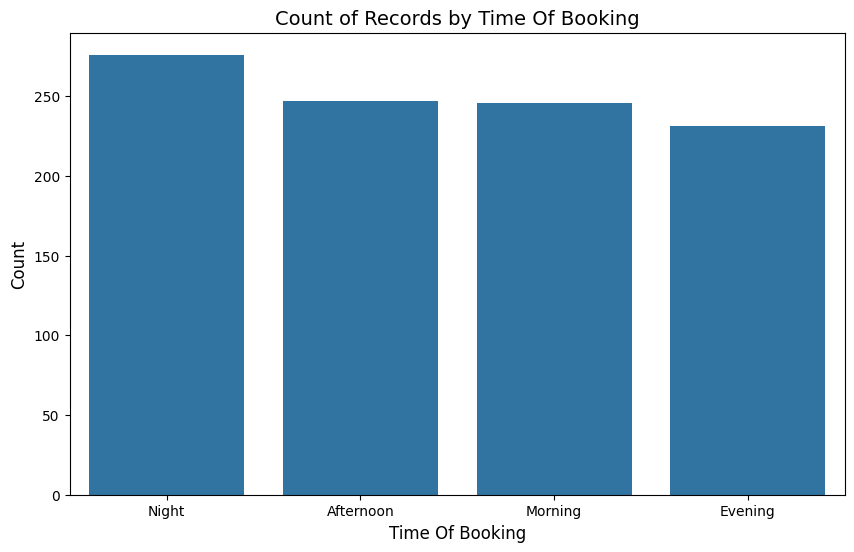


--- Visualizing Key Relationships ---


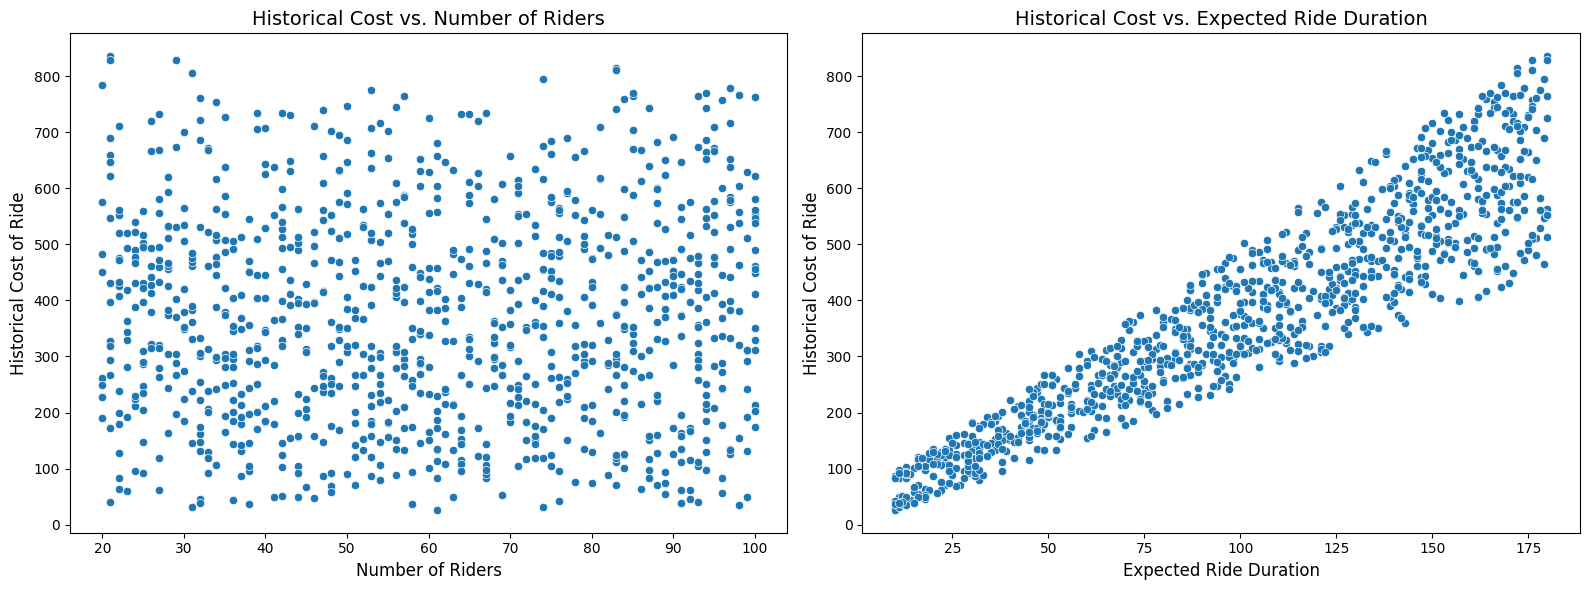


--- Visualizing Conversion Rate by Segment ---


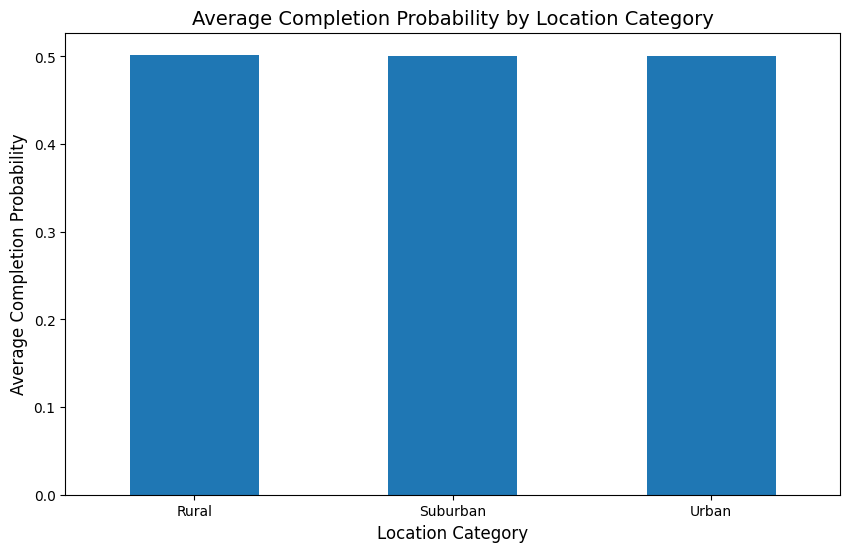

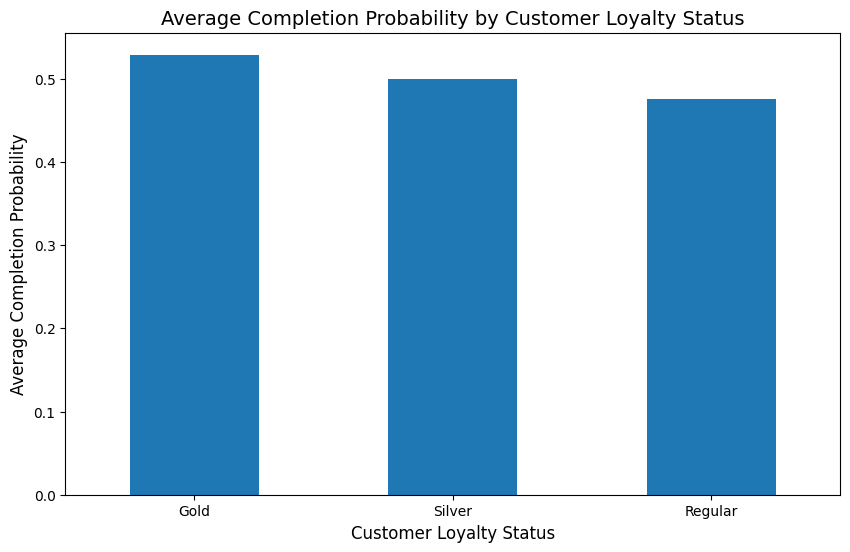

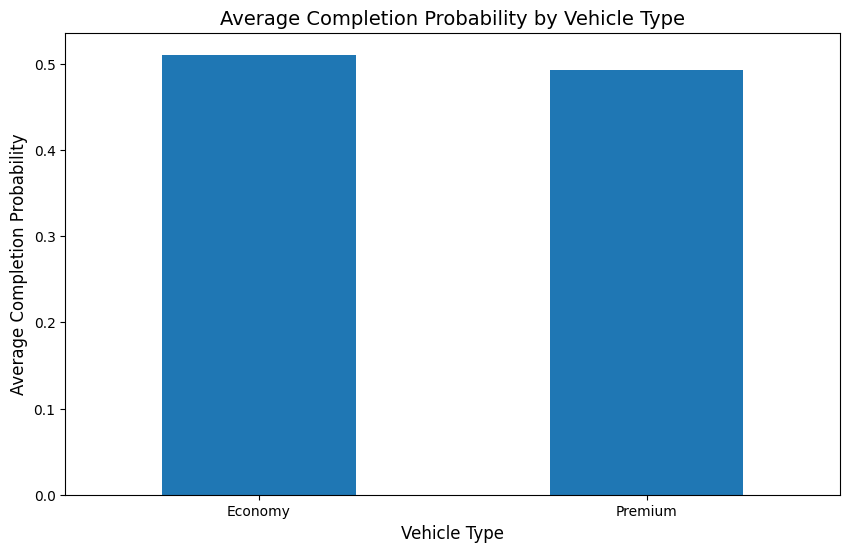

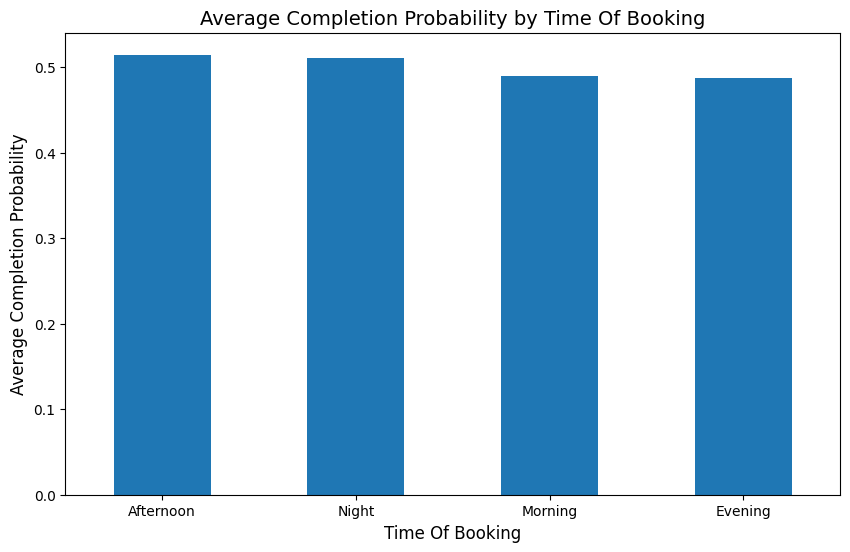


--- Correlation Heatmap of Key Engineered Features ---


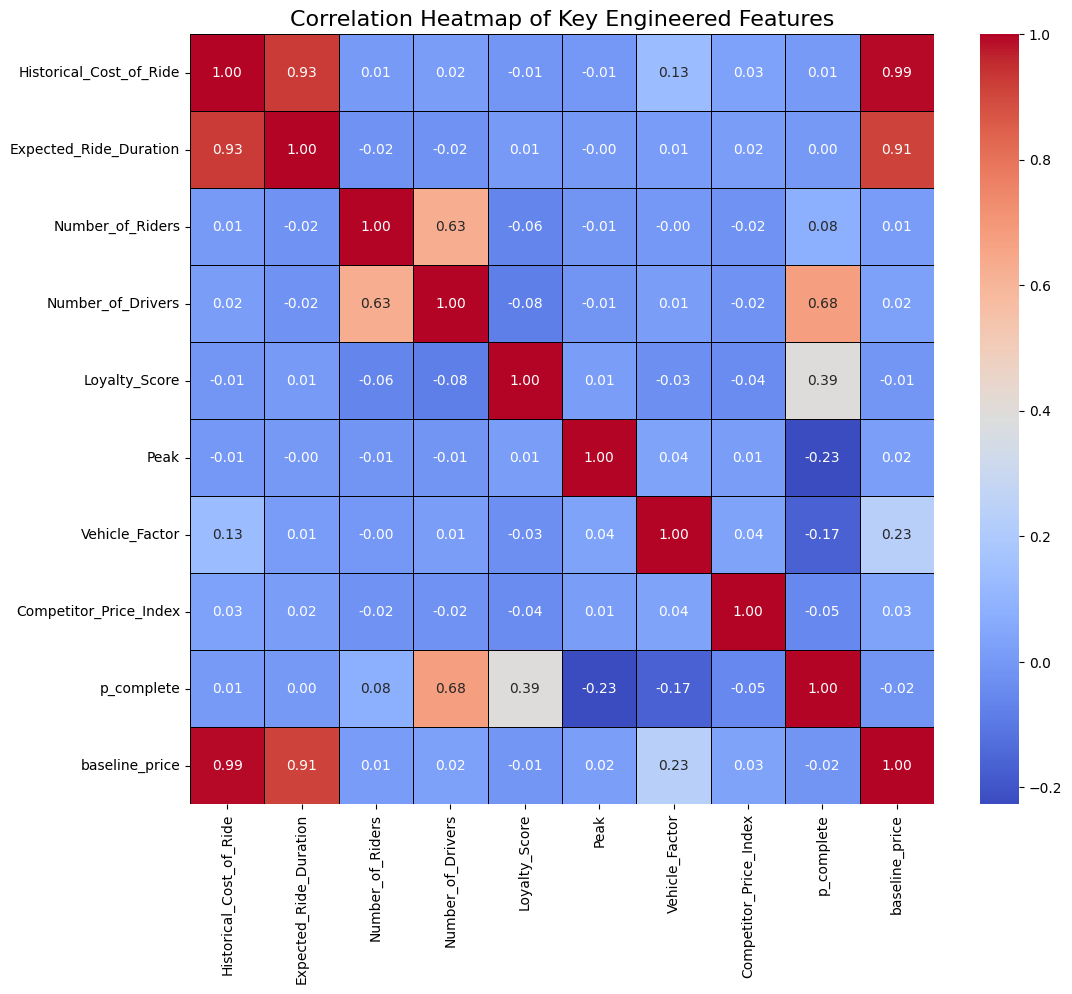

In [21]:
numeric_cols = df_fe.select_dtypes(include=[np.number]).columns.tolist()
# Exclude new ratio columns for clarity in this view
features_to_plot = ['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride', 'Average_Ratings', 'Loyalty_Score', 'Cost_per_Min']

for col in features_to_plot:
    if col in df_fe.columns:
        plt.figure(figsize=(12, 5))

        # Boxplot for Outlier View
        plt.subplot(1, 2, 1)
        sns.boxplot(x=df_fe[col])
        plt.title(f"Boxplot of {col}", fontsize=14)
        plt.xlabel(col, fontsize=12)

        # Histogram for Numeric Distribution
        plt.subplot(1, 2, 2)
        sns.histplot(df_fe[col], kde=True)
        plt.title(f"Distribution of {col}", fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel("Frequency", fontsize=12)

        plt.tight_layout()
        plt.show()

# 3.2 Categorical counts
print("\n--- Visualizing Categorical Feature Counts ---")
categorical_cols = ['Location_Category', 'Customer_Loyalty_Status', 'Vehicle_Type', 'Time_of_Booking']
for col in categorical_cols:
    if col in df_fe.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, data=df_fe, order=df_fe[col].value_counts().index)
        plt.title(f"Count of Records by {col.replace('_', ' ').title()}", fontsize=14)
        plt.xlabel(col.replace('_', ' ').title(), fontsize=12)
        plt.ylabel("Count", fontsize=12)
        plt.show()

# 3.3 Relationships
print("\n--- Visualizing Key Relationships ---")

# Scatter plot of key variables against the target variable
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Relationship between Number of Riders and Historical Cost of Ride
sns.scatterplot(x='Number_of_Riders', y='Historical_Cost_of_Ride', data=df_fe, ax=ax[0])
ax[0].set_title('Historical Cost vs. Number of Riders', fontsize=14)
ax[0].set_xlabel('Number of Riders', fontsize=12)
ax[0].set_ylabel('Historical Cost of Ride', fontsize=12)

# Relationship between Expected Ride Duration and Historical Cost of Ride
sns.scatterplot(x='Expected_Ride_Duration', y='Historical_Cost_of_Ride', data=df_fe, ax=ax[1])
ax[1].set_title('Historical Cost vs. Expected Ride Duration', fontsize=14)
ax[1].set_xlabel('Expected Ride Duration', fontsize=12)
ax[1].set_ylabel('Historical Cost of Ride', fontsize=12)

plt.tight_layout()
plt.show()

# 3.4 Conversion by segments (using our p_complete proxy)
print("\n--- Visualizing Conversion Rate by Segment ---")

# Bar plots of the mean p_complete for each categorical feature
for col in categorical_cols:
    if col in df_fe.columns and 'p_complete' in df_fe.columns:
        plt.figure(figsize=(10, 6))
        df_fe.groupby(col)['p_complete'].mean().sort_values(ascending=False).plot(kind='bar')
        plt.title(f"Average Completion Probability by {col.replace('_', ' ').title()}", fontsize=14)
        plt.xlabel(col.replace('_', ' ').title(), fontsize=12)
        plt.ylabel("Average Completion Probability", fontsize=12)
        plt.xticks(rotation=0)
        plt.show()

# 3.5 Correlation heatmap (key engineered features)
print("\n--- Correlation Heatmap of Key Engineered Features ---")
# Select a subset of relevant features for the heatmap
heatmap_cols = ['Historical_Cost_of_Ride', 'Expected_Ride_Duration', 'Number_of_Riders',
                'Number_of_Drivers', 'Loyalty_Score', 'Peak', 'Vehicle_Factor',
                'Competitor_Price_Index', 'p_complete', 'baseline_price']

# Calculate the correlation matrix
corr_matrix = df_fe[heatmap_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=.5, linecolor='black')
plt.title('Correlation Heatmap of Key Engineered Features', fontsize=16)
plt.show()

                 mean_conv  mean_price  total_intents
Time_of_Booking                                      
Afternoon         0.521135  490.493968          14708
Night             0.519533  472.707862          17009
Evening           0.500672  469.159134          13980
Morning           0.499399  486.943902          14675


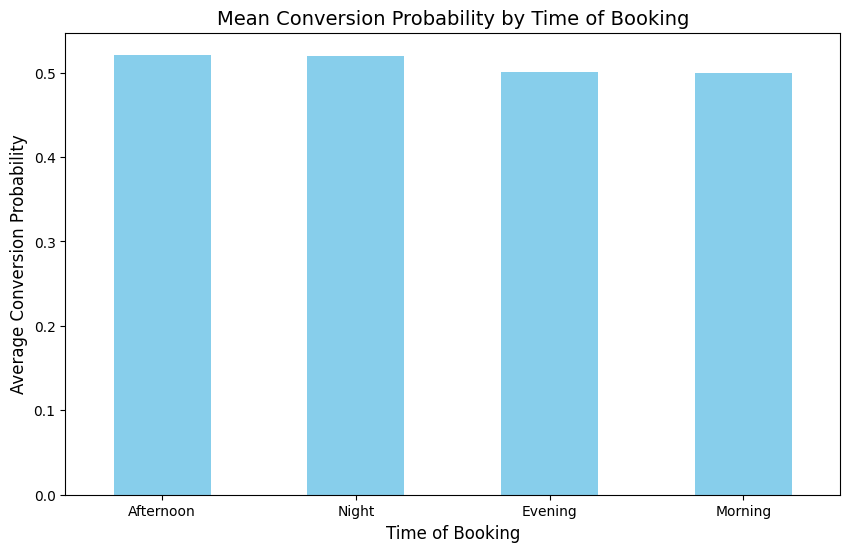


--- 3.2 Competitor Pressure: Price Gap Analysis ---
              avg_gap_pct  mean_comp_price  mean_our_price
Vehicle_Type                                              
Economy          2.088464       437.245272      446.386590
Premium          2.264200       499.322759      510.365038


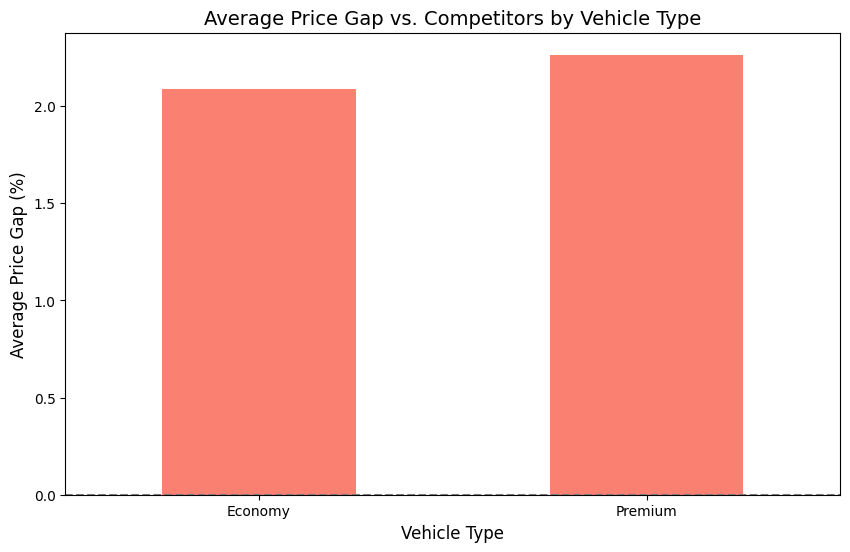


--- 3.3 Inventory Health Bands & Conversion ---
                mean_conv  mean_price  count
Inventory_Band                              
Very Tight       0.480493  479.543694    628
Tight            0.555725  486.022355    327
Balanced         0.603266  437.790889     45
Loose                 NaN         NaN      0


/tmp/ipython-input-2804929995.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  inv_summary = df_fe.groupby("Inventory_Band").agg(


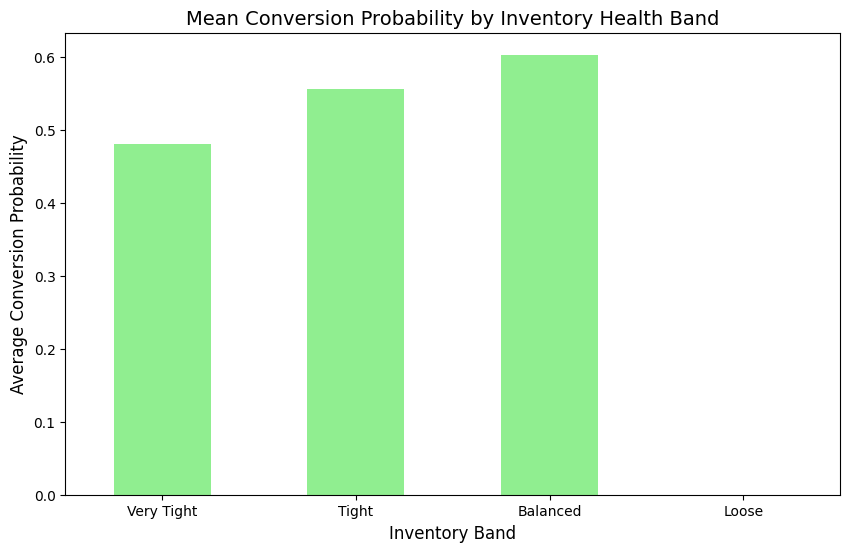


--- 4. Customer Segmentation (K-Means) ---
            mean_conv  mean_price   mean_cost  mean_loyalty  mean_ratio  count
segment_k4                                                                    
3            0.564150  505.136142  392.186389      0.972222    1.507497    324
0            0.507177  251.196807  195.029071      0.764706    2.578678    119
2            0.485696  533.026840  413.840627      1.018711    3.435213    481
1            0.445534  392.643421  304.847792      1.276316   10.366208     76


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

seasonality = (
    df_fe.groupby("Time_of_Booking")
        .agg(mean_conv=("p_complete", "mean"),
             mean_price=("price", "mean"),
             total_intents=("Number_of_Riders", "sum"))
        .sort_values("mean_conv", ascending=False)
)
print(seasonality)

plt.figure(figsize=(10, 6))
seasonality["mean_conv"].plot(kind="bar", color='skyblue')
plt.title("Mean Conversion Probability by Time of Booking", fontsize=14)
plt.xlabel("Time of Booking", fontsize=12)
plt.ylabel("Average Conversion Probability", fontsize=12)
plt.xticks(rotation=0)
plt.show()

print("\n--- 3.2 Competitor Pressure: Price Gap Analysis ---")
df_fe["Competitor_Gap_pct"] = ((df_fe["price"] - df_fe["competitor_price"]) / df_fe["competitor_price"]) * 100.0

comp_pressure = (
    df_fe.groupby("Vehicle_Type")
        .agg(
            avg_gap_pct=("Competitor_Gap_pct", "mean"),
            mean_comp_price=("competitor_price", "mean"),
            mean_our_price=("price", "mean"),
        )
        .sort_values("avg_gap_pct")
)
print(comp_pressure)

plt.figure(figsize=(10, 6))
comp_pressure["avg_gap_pct"].plot(kind="bar", color='salmon')
plt.title("Average Price Gap vs. Competitors by Vehicle Type", fontsize=14)
plt.xlabel("Vehicle Type", fontsize=12)
plt.ylabel("Average Price Gap (%)", fontsize=12)
plt.xticks(rotation=0)
plt.axhline(0, color='grey', linestyle='--')
plt.show()

print("\n--- 3.3 Inventory Health Bands & Conversion ---")
bins = [0, 0.5, 0.8, 1.2, 10]
labels = ["Very Tight", "Tight", "Balanced", "Loose"]
df_fe["Inventory_Band"] = pd.cut(df_fe["Driver_to_Rider_Ratio"], bins=bins, labels=labels, include_lowest=True)

inv_summary = df_fe.groupby("Inventory_Band").agg(
    mean_conv=("p_complete", "mean"),
    mean_price=("price", "mean"),
    count=("Inventory_Band", "size")
)
print(inv_summary)

plt.figure(figsize=(10, 6))
inv_summary["mean_conv"].plot(kind="bar", color='lightgreen')
plt.title("Mean Conversion Probability by Inventory Health Band", fontsize=14)
plt.xlabel("Inventory Band", fontsize=12)
plt.ylabel("Average Conversion Probability", fontsize=12)
plt.xticks(rotation=0)
plt.show()

# --- 4. Customer Segmentation (K-Means) ---

print("\n--- 4. Customer Segmentation (K-Means) ---")
seg_features = [
    "Loyalty_Score", "Rider_Driver_Ratio", "Driver_to_Rider_Ratio",
    "Supply_Tightness", "Cost_per_Min", "Inventory_Health_Index",
    "Expected_Ride_Duration"
]
X = df_fe[seg_features].copy().fillna(df_fe[seg_features].median())

scaler = StandardScaler()
Xs = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_fe["segment_k4"] = kmeans.fit_predict(Xs)

seg_profile = (
    df_fe.groupby("segment_k4")
        .agg(
            mean_conv=("p_complete", "mean"),
            mean_price=("price", "mean"),
            mean_cost=("Historical_Cost_of_Ride", "mean"),
            mean_loyalty=("Loyalty_Score", "mean"),
            mean_ratio=("Rider_Driver_Ratio", "mean"),
            count=("segment_k4", "size")
        )
        .sort_values("mean_conv", ascending=False)
)
print(seg_profile)

In [24]:
print(df_fe.columns)

Index(['Number_of_Riders', 'Number_of_Drivers', 'Location_Category',
       'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings',
       'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration',
       'Historical_Cost_of_Ride', 'Loyalty_Score', 'Rider_Driver_Ratio',
       'Driver_to_Rider_Ratio', 'Supply_Tightness', 'Cost_per_Min',
       'Vehicle_Factor', 'Peak', 'Inventory_Health_Index', 'baseline_price',
       'competitor_price', 'Competitor_Price_Index', 'price', 'p_complete',
       'Competitor_Gap_pct', 'Inventory_Band'],
      dtype='object')


In [31]:
import numpy as np
import pandas as pd
from IPython.display import display

# ASSUMPTION: The original 'df' and feature-engineered 'df_fe' DataFrames exist and are populated.
# The 'estimate_p_complete' function is also assumed to be defined from a previous step.

# --- Helper: Gross Margin % ---
def gm_pct(price, cost):
    price = float(price)
    cost = float(cost)
    if price <= 0:
        return 0.0
    return (price - cost) / price

# --- Policy parameters (tweakable) ---
STABILITY_PCT = 0.15 # 15%
MIN_GM_PCT = 0.12 # 12%

# Competitiveness caps/floors (vs competitor_price)
COMP_CAP = {"economy": 1.05, "premium": 1.08}
COMP_FLOOR = {"economy": 0.90, "premium": 0.88}

# Time-based nudges (move center higher on peak)
TIME_NUDGE = {"morning": +0.03, "afternoon": 0.0, "evening": +0.04, "night": +0.01}

# Inventory-based nudge via Driver_to_Rider_Ratio
def inv_nudge(ratio):
    if ratio < 0.8:
        return +0.03
    if ratio > 1.2:
        return -0.03
    return 0.0

# --- Combined row bounds from all rules ---
def row_price_bounds(row):
    base = float(row["baseline_price"])
    cost = float(row["Historical_Cost_of_Ride"])
    veh = str(row.get("Vehicle_Type", "economy"))
    comp = float(row.get("competitor_price", base))

    lo_stab, hi_stab = base * (1 - STABILITY_PCT), base * (1 + STABILITY_PCT)
    base_gm = gm_pct(base, cost)
    min_gm = max(MIN_GM_PCT, base_gm)
    lo_gm = cost / max(1 - min_gm, 1e-9)

    cap = COMP_CAP.get(veh, 1.06)
    floor = COMP_FLOOR.get(veh, 0.90)
    lo_cmp = comp * floor
    hi_cmp = comp * cap

    lower = max(lo_stab, lo_gm, lo_cmp)
    upper = min(hi_stab, hi_cmp)

    if upper < lower:
        return upper, upper
    return lower, upper

# --- Choose best price per row, respecting cancellation and GM ---
def choose_row_price(row, n_grid=11):
    base = float(row["baseline_price"])
    cost = float(row["Historical_Cost_of_Ride"])
    p_base = float(row["p_complete"])
    lo, hi = row_price_bounds(row)

    t_n = TIME_NUDGE.get(str(row.get("Time_of_Booking", "afternoon")), 0.0)
    i_n = inv_nudge(float(row.get("Driver_to_Rider_Ratio", 1.0)))
    center = np.clip(base * (1 + t_n + i_n), lo, hi)

    left = np.linspace(lo, center, max(2, n_grid // 2), endpoint=False)
    right = np.linspace(center, hi, max(2, n_grid - len(left)), endpoint=True)
    grid = np.unique(np.concatenate([left, right]))

    best_price, best_p, best_rev = base, p_base, base * p_base
    for p in grid:
        if gm_pct(p, cost) < MIN_GM_PCT:
            continue
        p_now = estimate_p_complete(row, p)
        if p_now + 1e-9 < p_base:
            continue
        rev = p * p_now
        if rev > best_rev:
            best_price, best_p, best_rev = float(p), float(p_now), float(rev)
    return best_price, best_p

# --- First-pass recommendation ---
def get_first_pass_recommendations(df_fe):
    df_rec = df_fe.copy()
    prices = []
    pcomps = []
    for _, r in df_rec.iterrows():
        p_star, pcomp_star = choose_row_price(r)
        prices.append(p_star)
        pcomps.append(pcomp_star)
    df_rec["price"] = np.array(prices).round(2)
    df_rec["p_complete"] = np.clip(np.array(pcomps), 0.02, 0.98)
    return df_rec

# --- Global tuning to hit +5% to +10% Lift (aim ~7.5%) ---
def evaluate_with_multiplier(df, mult):
    tmp = df.copy()
    tmp["price"] = np.clip(tmp["price"] * (1 + mult), tmp["lo"], tmp["hi"])
    tmp["p_complete"] = tmp.apply(lambda r: estimate_p_complete(r, r["price"]), axis=1)
    # This line calls a function that is not defined in this code block.
    # You need to ensure the 'compute_kpis' function is defined here or imported.
    kpis = compute_kpis(df_base=df_fe, df_scn=tmp)
    return kpis, tmp

# --- Policy Audit & Violations ---
def audit_policies(df_base, df_scn):
    base_gm = (df_base["baseline_price"] - df_base["Historical_Cost_of_Ride"]) / df_base["baseline_price"]
    scn_gm = (df_scn["price"] - df_scn["Historical_Cost_of_Ride"]) / df_scn["price"]

    checks = {}
    checks["Price Stability within ±15%"] = ((df_scn["price"] >= df_base["baseline_price"] * 0.85) &
                                            (df_scn["price"] <= df_base["baseline_price"] * 1.15)).all()

    checks["GM ≥ 12% (row-wise)"] = (scn_gm >= MIN_GM_PCT - 1e-9).all()
    checks["GM not below baseline (row-wise)"] = (scn_gm + 1e-9 >= base_gm).all()

    checks["No increase in cancellation (row-wise)"] = (df_scn["p_complete"] + 1e-9 >= df_base["p_complete"]).all()

    veh_str = df_base["Vehicle_Type"].astype(str)
    cap = pd.to_numeric(veh_str.map(COMP_CAP), errors="coerce").fillna(1.06)
    floor = pd.to_numeric(veh_str.map(COMP_FLOOR), errors="coerce").fillna(0.90)

    up_ok = (df_scn["price"] <= df_base["competitor_price"] * cap + 1e-6).all()
    lo_ok = (df_scn["price"] >= df_base["competitor_price"] * floor - 1e-6).all()
    checks["Competitiveness caps/floors"] = bool(up_ok and lo_ok)

    return checks

def violations_table(df_base, df_scn):
    base_gm = (df_base["baseline_price"] - df_base["Historical_Cost_of_Ride"]) / df_base["baseline_price"]
    scn_gm = (df_scn["price"] - df_scn["Historical_Cost_of_Ride"]) / df_scn["price"]

    veh_str = df_base["Vehicle_Type"].astype(str)
    cap = pd.to_numeric(veh_str.map(COMP_CAP), errors="coerce").fillna(1.06)
    floor = pd.to_numeric(veh_str.map(COMP_FLOOR), errors="coerce").fillna(0.90)

    v = pd.DataFrame({
        "stab_ok": df_scn["price"].between(df_base["baseline_price"] * 0.85, df_base["baseline_price"] * 1.15),
        "gm12_ok": (scn_gm >= MIN_GM_PCT - 1e-9),
        "gm_base_ok": (scn_gm + 1e-9 >= base_gm),
        "cancel_ok": (df_scn["p_complete"] + 1e-9 >= df_base["p_complete"]),
        "comp_up_ok": (df_scn["price"] <= df_base["competitor_price"] * cap + 1e-6),
        "comp_lo_ok": (df_scn["price"] >= df_base["competitor_price"] * floor - 1e-6)
    })
    v["all_ok"] = v.all(axis=1)
    return v[~v["all_ok"]]

def execute_full_flow(df_fe):
    df_fe["lo"], df_fe["hi"] = zip(*df_fe.apply(row_price_bounds, axis=1))

    df_rec = get_first_pass_recommendations(df_fe)

    target_mid = 7.5
    low, high = -0.15, 0.15
    best_mult, best_kpi, best_df = 0.0, None, df_rec

    for _ in range(18):
        mid = (low + high) / 2
        kpi_mid, df_mid = evaluate_with_multiplier(df_rec, mid)
        lift = kpi_mid["Revenue Lift (%)"]

        if best_kpi is None or abs(lift - target_mid) < abs(best_kpi["Revenue Lift (%)"] - target_mid):
            best_mult, best_kpi, best_df = mid, kpi_mid, df_mid

        if lift < target_mid:
            low = mid
        else:
            high = mid

    print(f"\nChosen global multiplier: {best_mult:.4f}")
    print("KPI summary vs baseline:")
    for k,v in best_kpi.items():
        print(f"- {k}: {v}")

    audit = audit_policies(df_fe, best_df)
    print("\nPolicy audit results:")
    for k,v in audit.items():
        print(f"- {k}: {v}")

    viol = violations_table(df_fe, best_df)
    if len(viol) > 0:
        print(f"\nFound {len(viol)} violating rows (showing up to 10):")
        display(viol.head(10))
    else:
        print("\nNo row-level violations detected.")

    show_cols = [
        "Vehicle_Type", "Time_of_Booking", "Location_Category", "Customer_Loyalty_Status",
        "Number_of_Riders", "Number_of_Drivers", "Driver_to_Rider_Ratio",
        "Historical_Cost_of_Ride", "competitor_price",
        "baseline_price", "p_complete"
    ]

    sample = df_fe[show_cols].copy()
    sample = sample.rename(columns={"p_complete": "p_complete_baseline"})
    sample["price_recommended"] = best_df["price"].round(2)
    sample["p_complete_reco"] = best_df["p_complete"].round(4)
    sample["gm_baseline_%"] = ((sample["baseline_price"] - sample["Historical_Cost_of_Ride"]) / sample["baseline_price"] * 100).round(2)
    sample["gm_reco_%"] = ((sample["price_recommended"] - sample["Historical_Cost_of_Ride"]) / sample["price_recommended"] * 100).round(2)
    sample["cancel_rate_baseline_%"] = (100 - (df_fe["p_complete"] * 100)).round(2)
    sample["cancel_rate_reco_%"] = (100 - (best_df["p_complete"] * 100)).round(2)

    print("\nSample (top 10) of baseline vs recommended:")
    display(sample.head(10))

    kpis_final = compute_kpis(
        df_base=df_fe,
        df_scn=best_df,
        intents_col="Number_of_Riders",
        price_col="price",
        pcomplete_col="p_complete",
        cost_col="Historical_Cost_of_Ride"
    )
    print("\n=== FINAL KPIs (Scenario vs Baseline) ===")
    for k,v in kpis_final.items():
        print(f"{k}: {v}")

    recommended_prices = best_df["price"].round(2).values

    return recommended_prices
execute_full_flow(df_fe)


KPI Results
-----------
Revenue (₹) Baseline: 14868996.35
Revenue (₹) Scenario: 14868052.64
Revenue Lift (%): -0.01
Gross Margin (Baseline %): 22.36
Gross Margin (Scenario %): 22.35
Conversion Rate (Baseline %): 51.24
Conversion Rate (Scenario %): 51.24
Cancellation Rate (Baseline %): 48.76
Cancellation Rate (Scenario %): 48.76
Price Change Rate (%): 9.2

KPI Results
-----------
Revenue (₹) Baseline: 14868996.35
Revenue (₹) Scenario: 15262133.96
Revenue Lift (%): 2.64
Gross Margin (Baseline %): 22.36
Gross Margin (Scenario %): 25.15
Conversion Rate (Baseline %): 51.24
Conversion Rate (Scenario %): 50.69
Cancellation Rate (Baseline %): 48.76
Cancellation Rate (Scenario %): 49.31
Price Change Rate (%): 100.0

KPI Results
-----------
Revenue (₹) Baseline: 14868996.35
Revenue (₹) Scenario: 15264161.4
Revenue Lift (%): 2.66
Gross Margin (Baseline %): 22.36
Gross Margin (Scenario %): 25.16
Conversion Rate (Baseline %): 51.24
Conversion Rate (Scenario %): 50.69
Cancellation Rate (Baseline %)

,stab_ok,gm12_ok,gm_base_ok,cancel_ok,comp_up_ok,comp_lo_ok,all_ok
0,True,True,True,False,True,True,False
1,True,True,True,False,True,True,False
2,True,True,True,False,True,True,False
3,True,True,True,False,True,True,False
4,True,True,True,False,True,True,False
5,True,True,True,False,True,True,False
6,True,True,True,False,True,True,False
7,True,True,True,False,True,True,False
8,True,True,True,False,True,True,False
9,True,True,True,False,True,True,False



Sample (top 10) of baseline vs recommended:


,Vehicle_Type,Time_of_Booking,Location_Category,Customer_Loyalty_Status,Number_of_Riders,Number_of_Drivers,Driver_to_Rider_Ratio,Historical_Cost_of_Ride,competitor_price,baseline_price,p_complete_baseline,price_recommended,p_complete_reco,gm_baseline_%,gm_reco_%,cancel_rate_baseline_%,cancel_rate_reco_%
0,Premium,Night,Urban,Silver,90,45,0.500000,284.257273,355.12,366.12,0.533800,376.43,0.5297,22.36,24.49,46.62,47.03
1,Economy,Evening,Suburban,Silver,58,39,0.672414,173.874753,227.55,223.95,0.553686,241.20,0.5426,22.36,27.91,44.63,45.74
2,Premium,Afternoon,Rural,Silver,42,31,0.738095,329.795469,424.17,424.78,0.586540,449.62,0.5783,22.36,26.65,41.35,42.17
3,Premium,Afternoon,Rural,Regular,89,28,0.314607,470.201232,598.29,605.62,0.462209,634.19,0.4554,22.36,25.86,53.78,54.46
4,Economy,Afternoon,Rural,Regular,78,22,0.282051,579.681422,711.15,746.63,0.456174,753.82,0.4548,22.36,23.10,54.38,54.52
5,Economy,Night,Urban,Silver,59,35,0.593220,339.955361,417.05,437.86,0.555841,442.07,0.5545,22.36,23.10,44.42,44.55
6,Premium,Afternoon,Suburban,Regular,93,43,0.462366,104.061541,126.61,134.03,0.495384,134.21,0.4952,22.36,22.46,50.46,50.48
7,Premium,Afternoon,Rural,Gold,62,39,0.629032,235.811864,306.55,303.73,0.591826,324.94,0.5820,22.36,27.43,40.82,41.80
8,Economy,Evening,Rural,Silver,79,14,0.177215,501.412517,638.13,645.82,0.442726,676.42,0.4360,22.36,25.87,55.73,56.40
9,Premium,Night,Rural,Silver,42,6,0.142857,398.993365,512.18,513.90,0.453627,542.91,0.4455,22.36,26.51,54.64,55.45



KPI Results
-----------
Revenue (₹) Baseline: 14868996.35
Revenue (₹) Scenario: 15264161.4
Revenue Lift (%): 2.66
Gross Margin (Baseline %): 22.36
Gross Margin (Scenario %): 25.16
Conversion Rate (Baseline %): 51.24
Conversion Rate (Scenario %): 50.69
Cancellation Rate (Baseline %): 48.76
Cancellation Rate (Scenario %): 49.31
Price Change Rate (%): 100.0

=== FINAL KPIs (Scenario vs Baseline) ===
Revenue (₹) Baseline: 14868996.35
Revenue (₹) Scenario: 15264161.4
Revenue Lift (%): 2.66
Gross Margin (Baseline %): 22.36
Gross Margin (Scenario %): 25.16
Conversion Rate (Baseline %): 51.24
Conversion Rate (Scenario %): 50.69
Cancellation Rate (Baseline %): 48.76
Cancellation Rate (Scenario %): 49.31
Price Change Rate (%): 100.0


array([ 376.43,  241.2 ,  449.62,  634.19,  753.82,  442.07,  134.21,
        324.94,  676.42,  542.91,  860.47,  576.54,  673.97,  387.06,
        426.27,  580.19,  321.95,   63.43,  172.72,  503.65,  111.76,
         83.2 ,  513.84,  280.77,  314.17,  556.63,  238.16,  874.2 ,
        543.58,  692.9 ,  386.2 ,  631.54,  220.79,  673.92,  409.34,
        538.84,  600.62,  650.29,  331.67,  845.11,  447.88,  202.15,
        683.15,  667.63,  466.89,  412.09,  678.3 ,  483.97,  107.8 ,
        548.31,  723.66,  250.45,  263.53,  721.35,  553.87,  809.66,
        390.01,  539.64,  351.87,  325.99,  282.98,  388.37,  199.31,
        392.75,  876.06,  603.57,  811.71,  131.66,  823.66,  411.22,
        483.26,   81.24,  341.63,  466.8 ,  603.09,  361.27,  302.84,
        507.84,  200.47,  406.94,  504.42,  575.68,  473.77,  335.92,
        421.94,  599.43,   61.5 ,  302.62,  239.01,  790.61,  491.74,
        491.02,  278.07,  744.34,  387.65,  581.92,  919.24,  839.09,
        702.43,  149